# Optimizing Santa's Workshop  

### Description:  
Hey friend, imagine you're a data analyst at the North Pole, responsible for helping Santa Claus optimize his workshop's operations. Your task is to analyze data from various toy production lines, inventory management, and gift deliveries to improve the overall efficiency of Santa's workshop.  

### Tasks:
- **Toy Production Analysis:** Calculate the total production cost for each toy type, considering the material costs and labor hours. Use the 'toy_type', 'material_cost' and 'labor_hours' columns for this analysis.
- **Inventory Management:** Identify the top 5 toys with the highest inventory levels and the longest storage times. Use the 'toy_type', 'inventory_level', and 'storage_time' columns for this analysis.
- **Gift Delivery Optimization:** Group gift deliveries by region and calculate the average delivery time for each region. Use the 'region' and 'delivery_time' columns for this analysis.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import sys

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Pandas version 2.2.1
Numpy version 1.26.4


# The Data  

The dataset consists of three main components: toy production, inventory, and gift delivery data, providing insights into Santa's workshop operations. It includes information on 1,000 toys, their production costs, inventory levels, and storage times, as well as data on 5,000 gift deliveries across four regions.  

# Columns  
- **toy_id:** Unique identifier for each toy
- **toy_type:** Type of toy (Doll, Car, Train, or Puzzle)
- **material_cost:** Cost of materials for each toy
- **labor_hours:** Number of labor hours required to produce each toy
- **production_quantity:** Quantity of each toy produced
- **inventory_level:** Current inventory level for each toy
- **storage_time:** Time each toy has been in storage
- **delivery_id:** Unique identifier for each gift delivery
- **region:** Region where each gift was delivered (North, South, East, or West)
- **delivery_time:** Time taken to deliver each gift

In [2]:
# set the seed
np.random.seed(0)

# generate toy production data
toy_production_data = {
    'toy_id': range(1, 1001),
    'toy_type': np.random.choice(['Doll', 'Car', 'Train', 'Puzzle'], size=1000),
    'material_cost': np.random.uniform(5, 15, size=1000),
    'labor_hours': np.random.uniform(1, 5, size=1000),
    'production_quantity': np.random.randint(100, 500, size=1000)
}

# generate inventory data
inventory_data = {
    'toy_id': range(1, 1001),
    'toy_type': np.random.choice(['Doll', 'Car', 'Train', 'Puzzle'], size=1000),
    'inventory_level': np.random.randint(50, 200, size=1000),
    'storage_time': np.random.uniform(1, 12, size=1000)
}

# generate gift delivery data
gift_delivery_data = {
    'delivery_id': range(1, 5001),
    'region': np.random.choice(['North', 'South', 'East', 'West'], size=5000),
    'delivery_time': np.random.uniform(1, 10, size=5000)
}

# create the DataFrames
toy_production = pd.DataFrame(toy_production_data)
inventory = pd.DataFrame(inventory_data)
gift_delivery = pd.DataFrame(gift_delivery_data)

Let us take a look at the data types for each of the three dataframes.

In [3]:
toy_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   toy_id               1000 non-null   int64  
 1   toy_type             1000 non-null   object 
 2   material_cost        1000 non-null   float64
 3   labor_hours          1000 non-null   float64
 4   production_quantity  1000 non-null   int32  
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 35.3+ KB


In [4]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   toy_id           1000 non-null   int64  
 1   toy_type         1000 non-null   object 
 2   inventory_level  1000 non-null   int32  
 3   storage_time     1000 non-null   float64
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 27.5+ KB


In [5]:
gift_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_id    5000 non-null   int64  
 1   region         5000 non-null   object 
 2   delivery_time  5000 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 117.3+ KB


# Toy Production Analysis
Calculate the total production cost for each toy type, considering the material costs and labor hours. Use the 'toy_type', 'material_cost' and 'labor_hours' columns for this analysis.  

We will need to make a guess how much santa was paying the elves. I think the elves were making $15 per hour. Do you think this is a fair rate for a toy maker in the North Pole?  

From the data, it seems like the Doll is the toy that costs the most to produce.

In [10]:
# hourly rate of $15
hourly_rate = 15.0

# calculate the total production cost per toy
toy_production['total_production_cost'] = toy_production['material_cost'] + (toy_production['labor_hours'] * hourly_rate)

# create group object
group = toy_production.groupby("toy_type")

# calculate the average total production cost per toy
group.mean()['total_production_cost'].sort_values(ascending=False)

toy_type
Doll      56.309188
Puzzle    56.191277
Car       55.255473
Train     53.876938
Name: total_production_cost, dtype: float64

# Inventory Management

Identify the top 5 toys with the highest inventory levels and the longest storage times. Use the 'toy_type', 'inventory_level', and 'storage_time' columns for this analysis.

Here we make use of the `sort_values` method and pass it two columns to sort.  

**Note:** the sort_values method sorts data in **ascending** order by default.

In [14]:
inventory.sort_values(by=['inventory_level','storage_time'], ascending=[False, False]).head()

toy_id toy_type  inventory_level  storage_time
63       64    Train              199     11.842191
591     592      Car              199      6.558659
535     536   Puzzle              199      6.109956
653     654      Car              199      3.807524
420     421   Puzzle              199      3.100684

I also asked `meta.ai` the following question out of curiosity.  

> in pandas, when using the method sort_values, what if i want to sort by multiple columns and I want to sort each one differently.

Here are a few followup questions you can try:
- can i also use a dictionary to pick column and order type
- so a list is the only way to pass columns and sort order in sort_values

# Gift Delivery Optimization

Group gift deliveries by region and calculate the average delivery time for each region. Use the 'region' and 'delivery_time' columns for this analysis.

In [16]:
# create group object
group = gift_delivery.groupby('region')

# calculate the average delivery time by region
group.mean()['delivery_time']

region
East     5.395364
North    5.528587
South    5.448332
West     5.561135
Name: delivery_time, dtype: float64

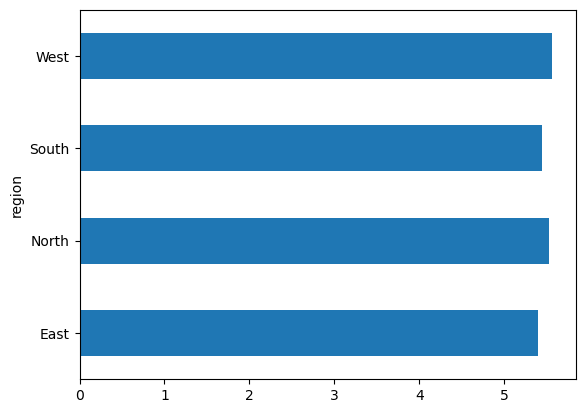

In [18]:
# we can also plot it!
group.mean()['delivery_time'].plot.barh();

# Summary
This tutorial used Pandas to analyze data from Santa's workshop, focusing on toy production, inventory management, and gift delivery optimization. The tutorial covered data generation, data frame creation, data analysis, and visualization.

### Key Takeaways
- Used the `groupby` method to group data by toy type and calculate total production costs
- Utilized the `mean` method to calculate average values, such as average total production cost per toy and average delivery time by region
- Employed the `sort_values` method to sort data by multiple columns, identifying top 5 toys with highest inventory levels and longest storage times
- Used the `head` method to display the top rows of a sorted DataFrame
- Applied the `plot.barh` method to visualize average delivery times by region

<p class="text-muted">This tutorial was created by <a href="https://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>